# MNIST (pg. 23)

In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

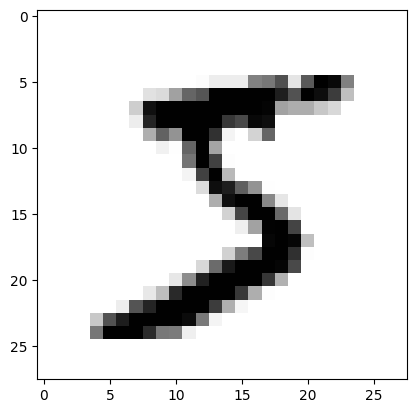

In [4]:
plt.imshow(train_images[0], cmap = plt.cm.binary)

In [5]:
model = keras.Sequential([
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")   
])

In [6]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [7]:
train_images_flattened = train_images.reshape((60000, 28 * 28))
train_images_flattened = train_images_flattened.astype("float32") / 255
test_images_flattened = test_images.reshape((10000, 28 * 28))
test_images_flattened = test_images_flattened.astype("float32") / 255

In [8]:
history = model.fit(train_images_flattened, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8733 - loss: 0.4563
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1155
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9803 - loss: 0.0686
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9870 - loss: 0.0473
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9897 - loss: 0.0361


<Axes: >

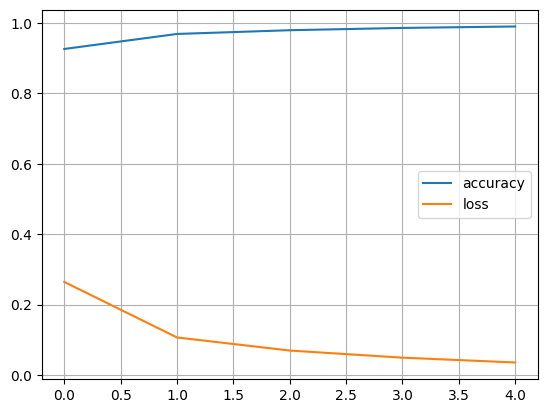

In [9]:
pd.DataFrame(history.history).plot(grid = True)

In [10]:
test_digits = test_images_flattened[0:10]

In [11]:
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [12]:
predictions[0]

array([3.3272127e-06, 2.6393661e-08, 4.1303218e-05, 1.1710605e-03,
       1.7967031e-10, 6.8867024e-07, 4.2469292e-10, 9.9874574e-01,
       4.9273335e-06, 3.2969234e-05], dtype=float32)

In [13]:
predictions[0].argmax()

np.int64(7)

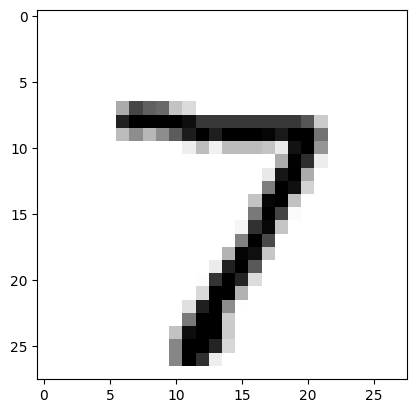

In [14]:
plt.imshow(test_images[0], cmap = plt.cm.binary)

In [15]:
test_loss, test_acc = model.evaluate(test_images_flattened, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.9757 - loss: 0.0827


In [16]:
test_acc

0.9797000288963318

Training accuracy is 0.99, test accuracy is 0.978, this suggests overfitting.